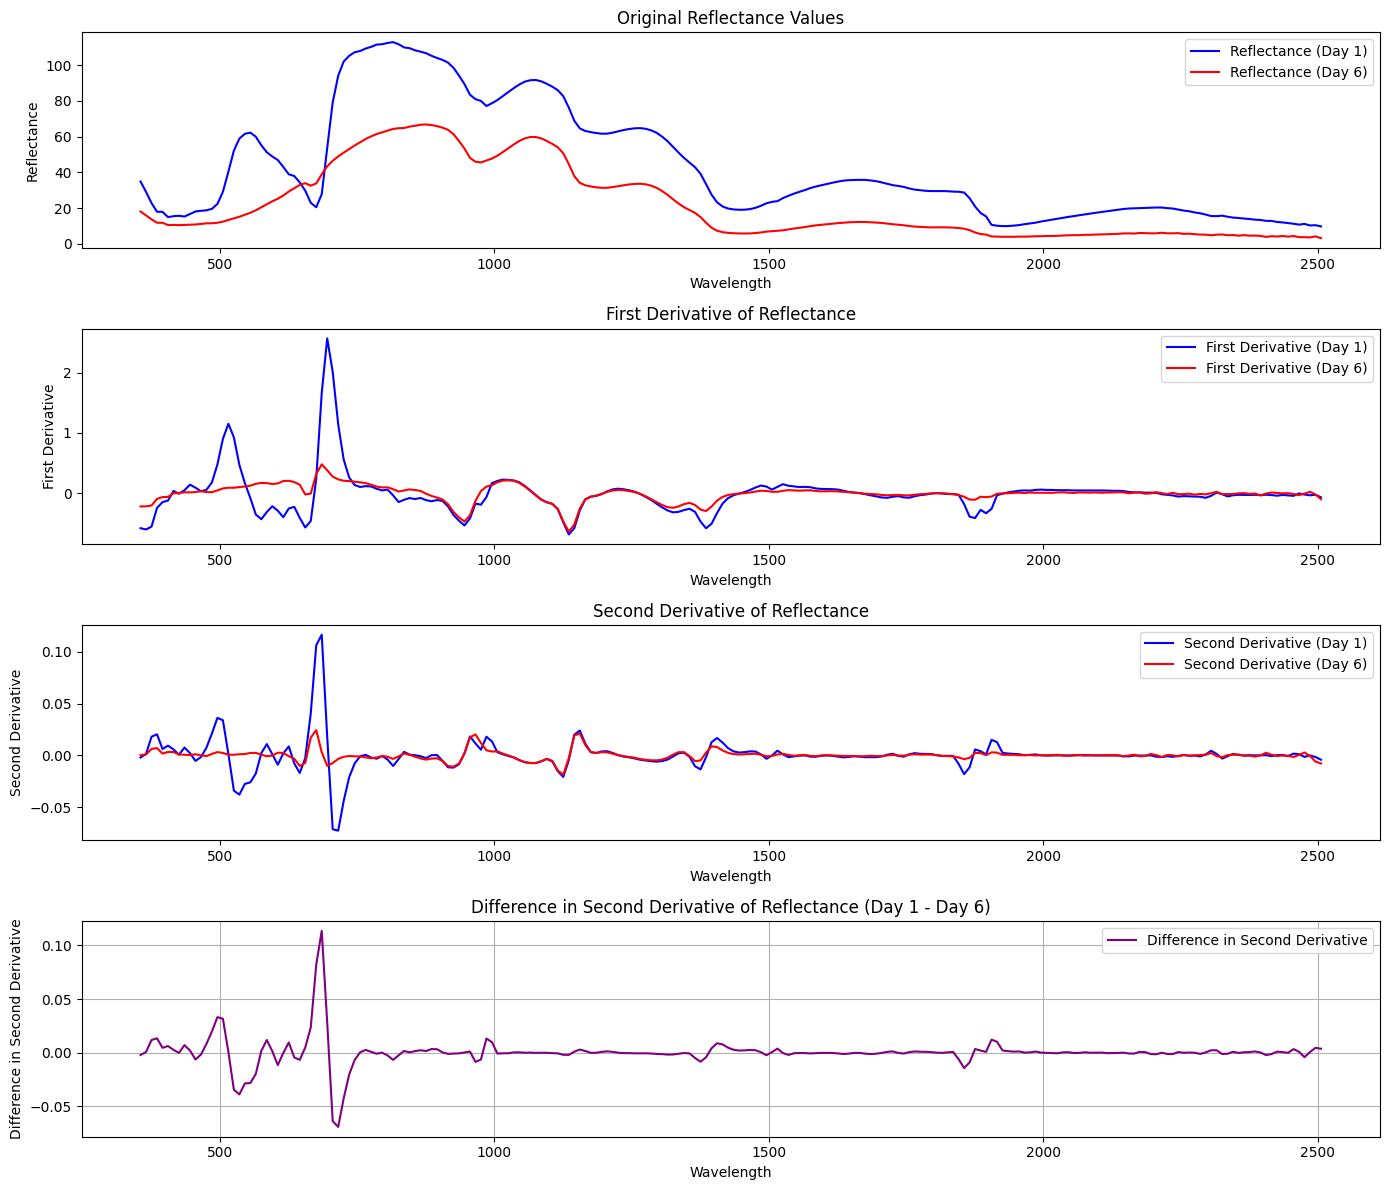

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Load the data from CSV files
file1 = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D1GS1.csv"
file2 = "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D6GS1.csv"
data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)

# Extract wavelength and reflectance values
wavelength1 = data1.iloc[:, 0]  # Assuming the first column is wavelength
reflectance1 = data1.iloc[:, -1]  # Assuming the last column is reflectance

wavelength2 = data2.iloc[:, 0]
reflectance2 = data2.iloc[:, -1]

# Compute the first and second derivatives of reflectance with respect to wavelength
first_derivative1 = np.gradient(reflectance1, wavelength1)
second_derivative1 = np.gradient(first_derivative1, wavelength1)

first_derivative2 = np.gradient(reflectance2, wavelength2)
second_derivative2 = np.gradient(first_derivative2, wavelength2)

# Interpolate second_derivative2 to match the wavelength points of second_derivative1
interp_func = interp1d(wavelength2, second_derivative2, kind='linear', fill_value="extrapolate")
second_derivative2_interp = interp_func(wavelength1)

# Calculate the difference between the second derivatives
second_derivative_diff = second_derivative1 - second_derivative2_interp

# Plotting the results
plt.figure(figsize=(14, 12))

# Original Reflectance
plt.subplot(4, 1, 1)
plt.plot(wavelength1, reflectance1, label='Reflectance (Day 1)', color='blue')
plt.plot(wavelength2, reflectance2, label='Reflectance (Day 6)', color='red')
plt.title("Original Reflectance Values")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.legend()

# First Derivative
plt.subplot(4, 1, 2)
plt.plot(wavelength1, first_derivative1, label='First Derivative (Day 1)', color='blue')
plt.plot(wavelength2, first_derivative2, label='First Derivative (Day 6)', color='red')
plt.title("First Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("First Derivative")
plt.legend()

# Second Derivative
plt.subplot(4, 1, 3)
plt.plot(wavelength1, second_derivative1, label='Second Derivative (Day 1)', color='blue')
plt.plot(wavelength2, second_derivative2, label='Second Derivative (Day 6)', color='red')
plt.title("Second Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("Second Derivative")
plt.legend()

# Difference in Second Derivative
plt.subplot(4, 1, 4)
plt.plot(wavelength1, second_derivative_diff, label='Difference in Second Derivative', color='purple')
plt.title("Difference in Second Derivative of Reflectance (Day 1 - Day 6)")
plt.xlabel("Wavelength")
plt.ylabel("Difference in Second Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


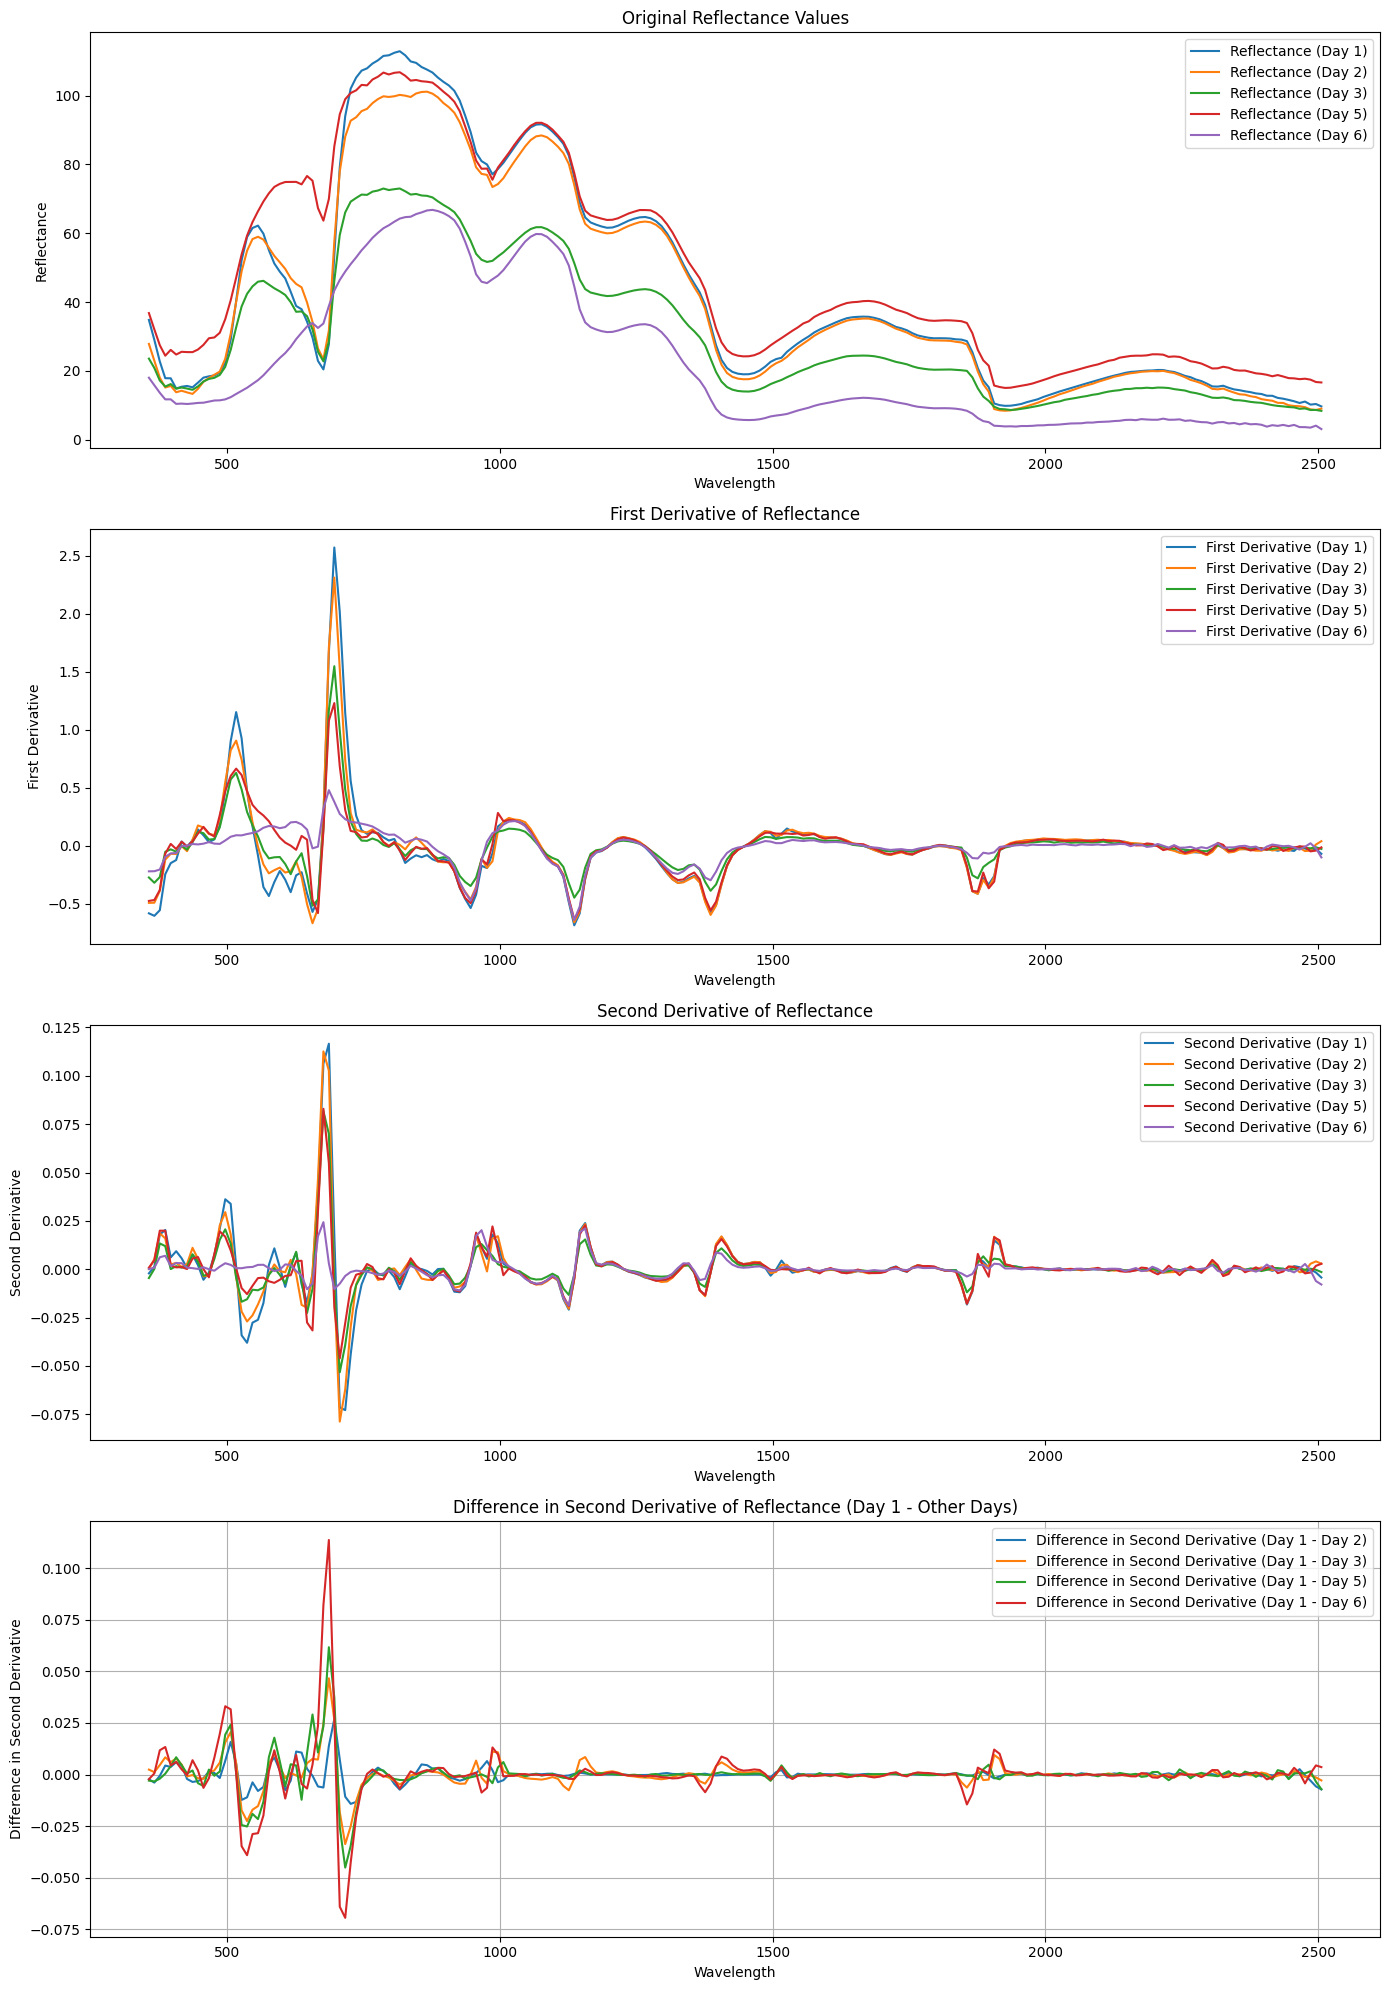

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# List of file paths, excluding Day 4
files = [
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D1GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D3GS1.csv",
    # Skipping Day 4
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D5GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D6GS1.csv"
]

# Initialize lists to hold wavelength, reflectance, and derivatives for each file
wavelengths = []
reflectances = []
first_derivatives = []
second_derivatives = []

# Load each file, calculate derivatives, and store results
for file in files:
    data = pd.read_csv(file)
    wavelength = data.iloc[:, 0]
    reflectance = data.iloc[:, -1]
    wavelengths.append(wavelength)
    reflectances.append(reflectance)
    
    # Calculate first and second derivatives
    first_derivative = np.gradient(reflectance, wavelength)
    second_derivative = np.gradient(first_derivative, wavelength)
    
    first_derivatives.append(first_derivative)
    second_derivatives.append(second_derivative)

# Use the wavelength of the first file as the reference for interpolation
ref_wavelength = wavelengths[0]

# Interpolate second derivatives to match the reference wavelength
second_derivatives_interp = []
for i in range(len(second_derivatives)):
    interp_func = interp1d(wavelengths[i], second_derivatives[i], kind='linear', fill_value="extrapolate")
    second_derivatives_interp.append(interp_func(ref_wavelength))

# Plotting the results
plt.figure(figsize=(14, 20))

# Original Reflectance for all files
plt.subplot(4, 1, 1)
for i, reflectance in enumerate(reflectances):
    plt.plot(wavelengths[i], reflectance, label=f'Reflectance (Day {i+1 if i < 3 else i+2})')
plt.title("Original Reflectance Values")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.legend()

# First Derivative for all files
plt.subplot(4, 1, 2)
for i, first_derivative in enumerate(first_derivatives):
    plt.plot(wavelengths[i], first_derivative, label=f'First Derivative (Day {i+1 if i < 3 else i+2})')
plt.title("First Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("First Derivative")
plt.legend()

# Second Derivative for all files
plt.subplot(4, 1, 3)
for i, second_derivative in enumerate(second_derivatives):
    plt.plot(wavelengths[i], second_derivative, label=f'Second Derivative (Day {i+1 if i < 3 else i+2})')
plt.title("Second Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("Second Derivative")
plt.legend()

# Differences in Second Derivative with respect to the first file
plt.subplot(4, 1, 4)
for i in range(1, len(second_derivatives_interp)):
    second_derivative_diff = second_derivatives_interp[0] - second_derivatives_interp[i]
    plt.plot(ref_wavelength, second_derivative_diff, label=f'Difference in Second Derivative (Day 1 - Day {i+1 if i < 3 else i+2})')
plt.title("Difference in Second Derivative of Reflectance (Day 1 - Other Days)")
plt.xlabel("Wavelength")
plt.ylabel("Difference in Second Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


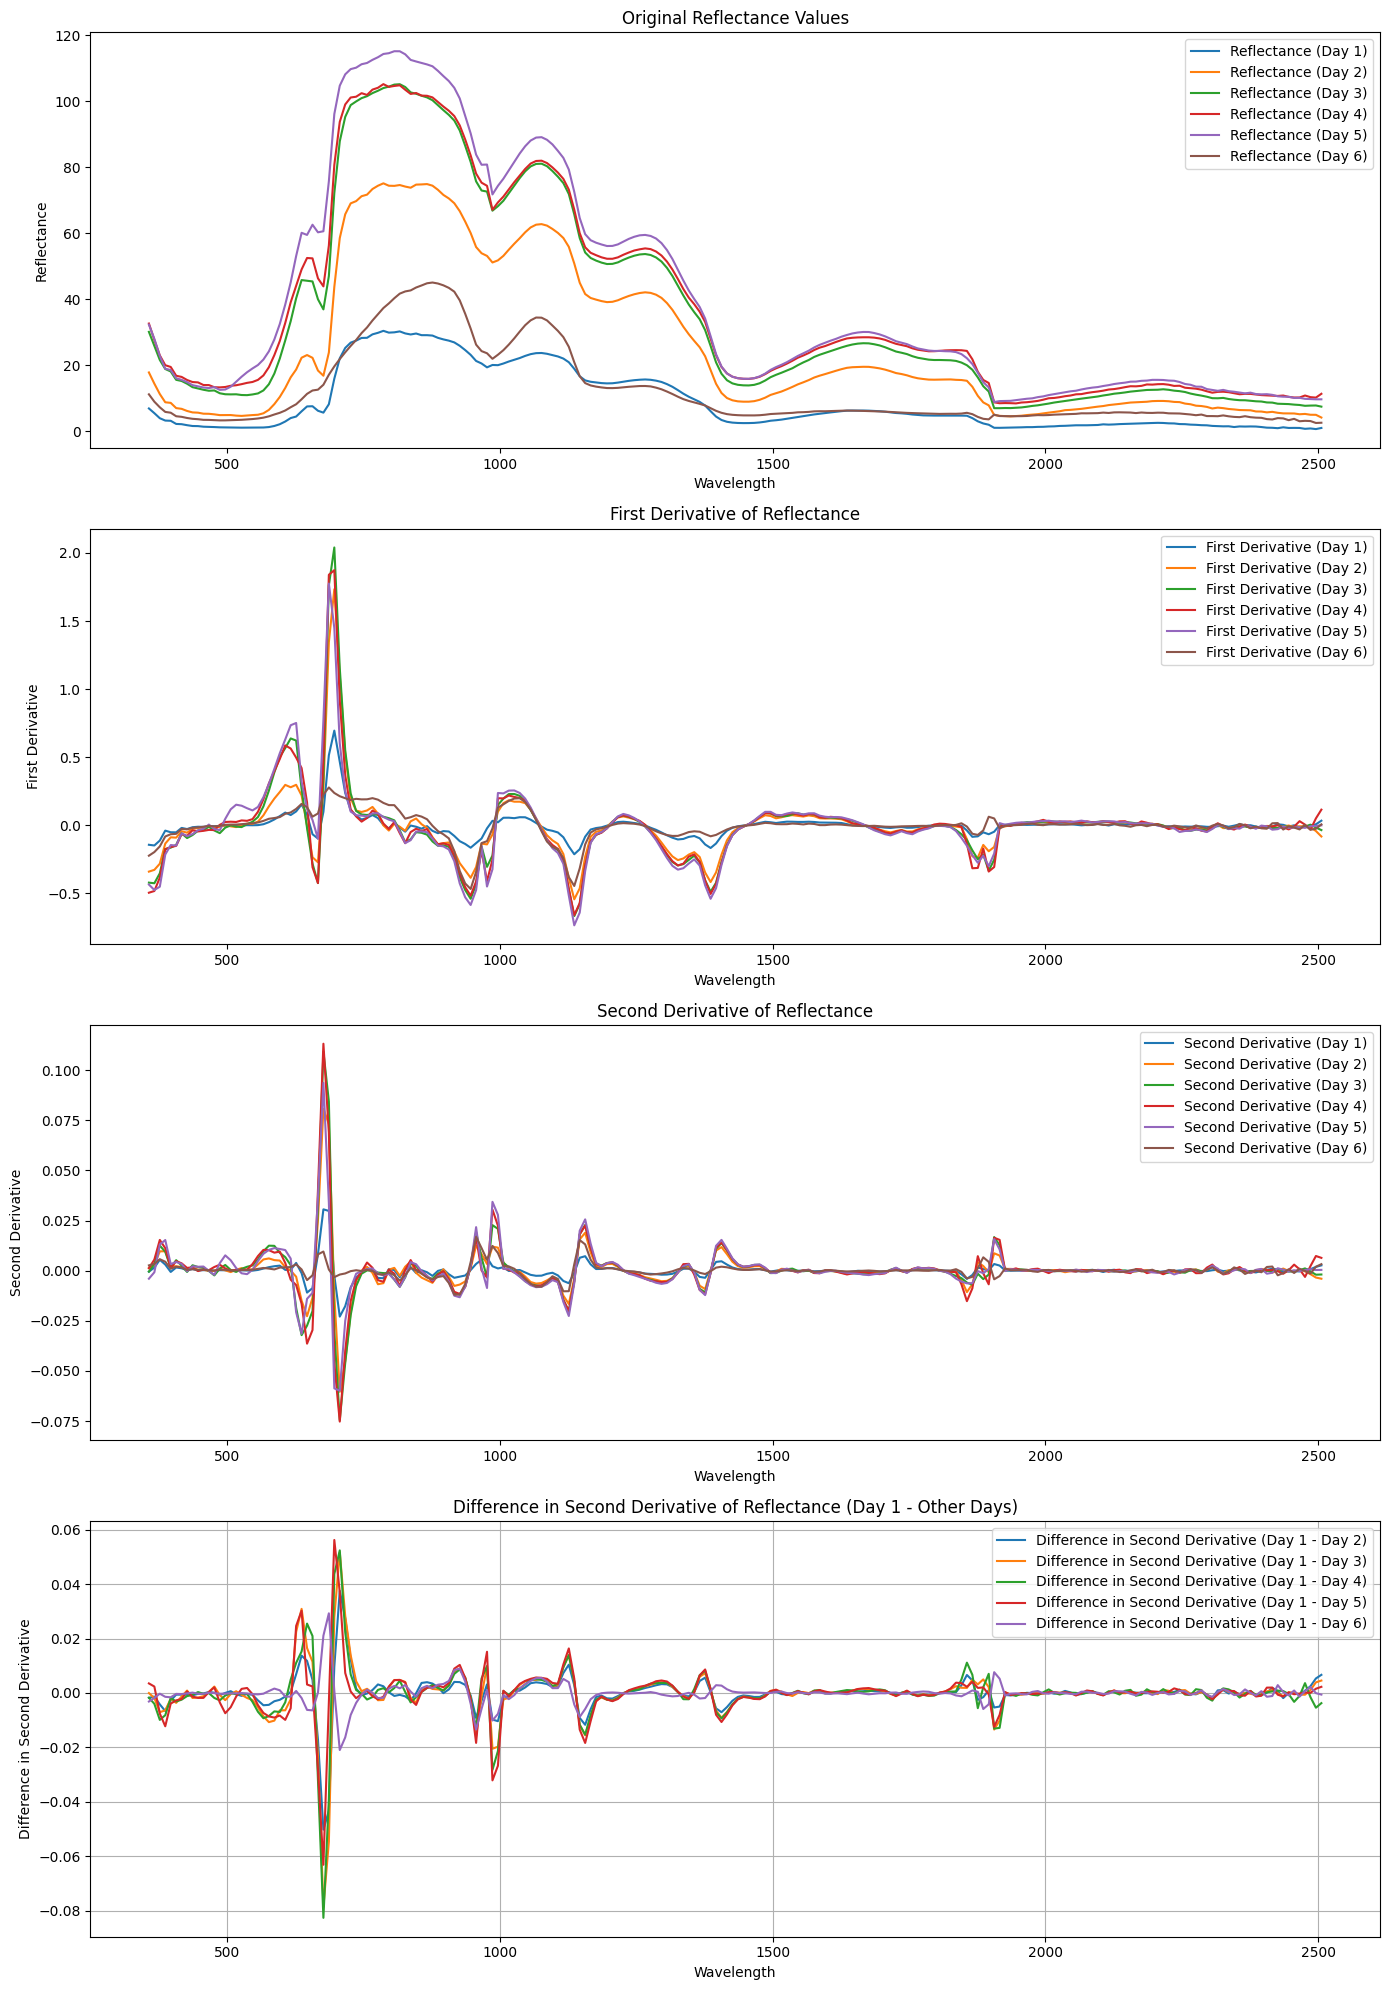

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# List of file paths
files = [
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D1RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D3RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D4RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D5RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D6RS1.csv"
]

# Initialize lists to hold wavelength, reflectance, and derivatives for each file
wavelengths = []
reflectances = []
first_derivatives = []
second_derivatives = []

# Load each file, calculate derivatives, and store results
for file in files:
    data = pd.read_csv(file)
    wavelength = data.iloc[:, 0]
    reflectance = data.iloc[:, -1]
    wavelengths.append(wavelength)
    reflectances.append(reflectance)
    
    # Calculate first and second derivatives
    first_derivative = np.gradient(reflectance, wavelength)
    second_derivative = np.gradient(first_derivative, wavelength)
    
    first_derivatives.append(first_derivative)
    second_derivatives.append(second_derivative)

# Use the wavelength of the first file as the reference for interpolation
ref_wavelength = wavelengths[0]

# Interpolate second derivatives to match the reference wavelength
second_derivatives_interp = []
for i in range(len(second_derivatives)):
    interp_func = interp1d(wavelengths[i], second_derivatives[i], kind='linear', fill_value="extrapolate")
    second_derivatives_interp.append(interp_func(ref_wavelength))

# Plotting the results
plt.figure(figsize=(14, 20))

# Original Reflectance for all files
plt.subplot(4, 1, 1)
for i, reflectance in enumerate(reflectances):
    plt.plot(wavelengths[i], reflectance, label=f'Reflectance (Day {i+1})')
plt.title("Original Reflectance Values")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.legend()

# First Derivative for all files
plt.subplot(4, 1, 2)
for i, first_derivative in enumerate(first_derivatives):
    plt.plot(wavelengths[i], first_derivative, label=f'First Derivative (Day {i+1})')
plt.title("First Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("First Derivative")
plt.legend()

# Second Derivative for all files
plt.subplot(4, 1, 3)
for i, second_derivative in enumerate(second_derivatives):
    plt.plot(wavelengths[i], second_derivative, label=f'Second Derivative (Day {i+1})')
plt.title("Second Derivative of Reflectance")
plt.xlabel("Wavelength")
plt.ylabel("Second Derivative")
plt.legend()

# Differences in Second Derivative with respect to the first file
plt.subplot(4, 1, 4)
for i in range(1, len(second_derivatives_interp)):
    second_derivative_diff = second_derivatives_interp[0] - second_derivatives_interp[i]
    plt.plot(ref_wavelength, second_derivative_diff, label=f'Difference in Second Derivative (Day 1 - Day {i+1})')
plt.title("Difference in Second Derivative of Reflectance (Day 1 - Other Days)")
plt.xlabel("Wavelength")
plt.ylabel("Difference in Second Derivative")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


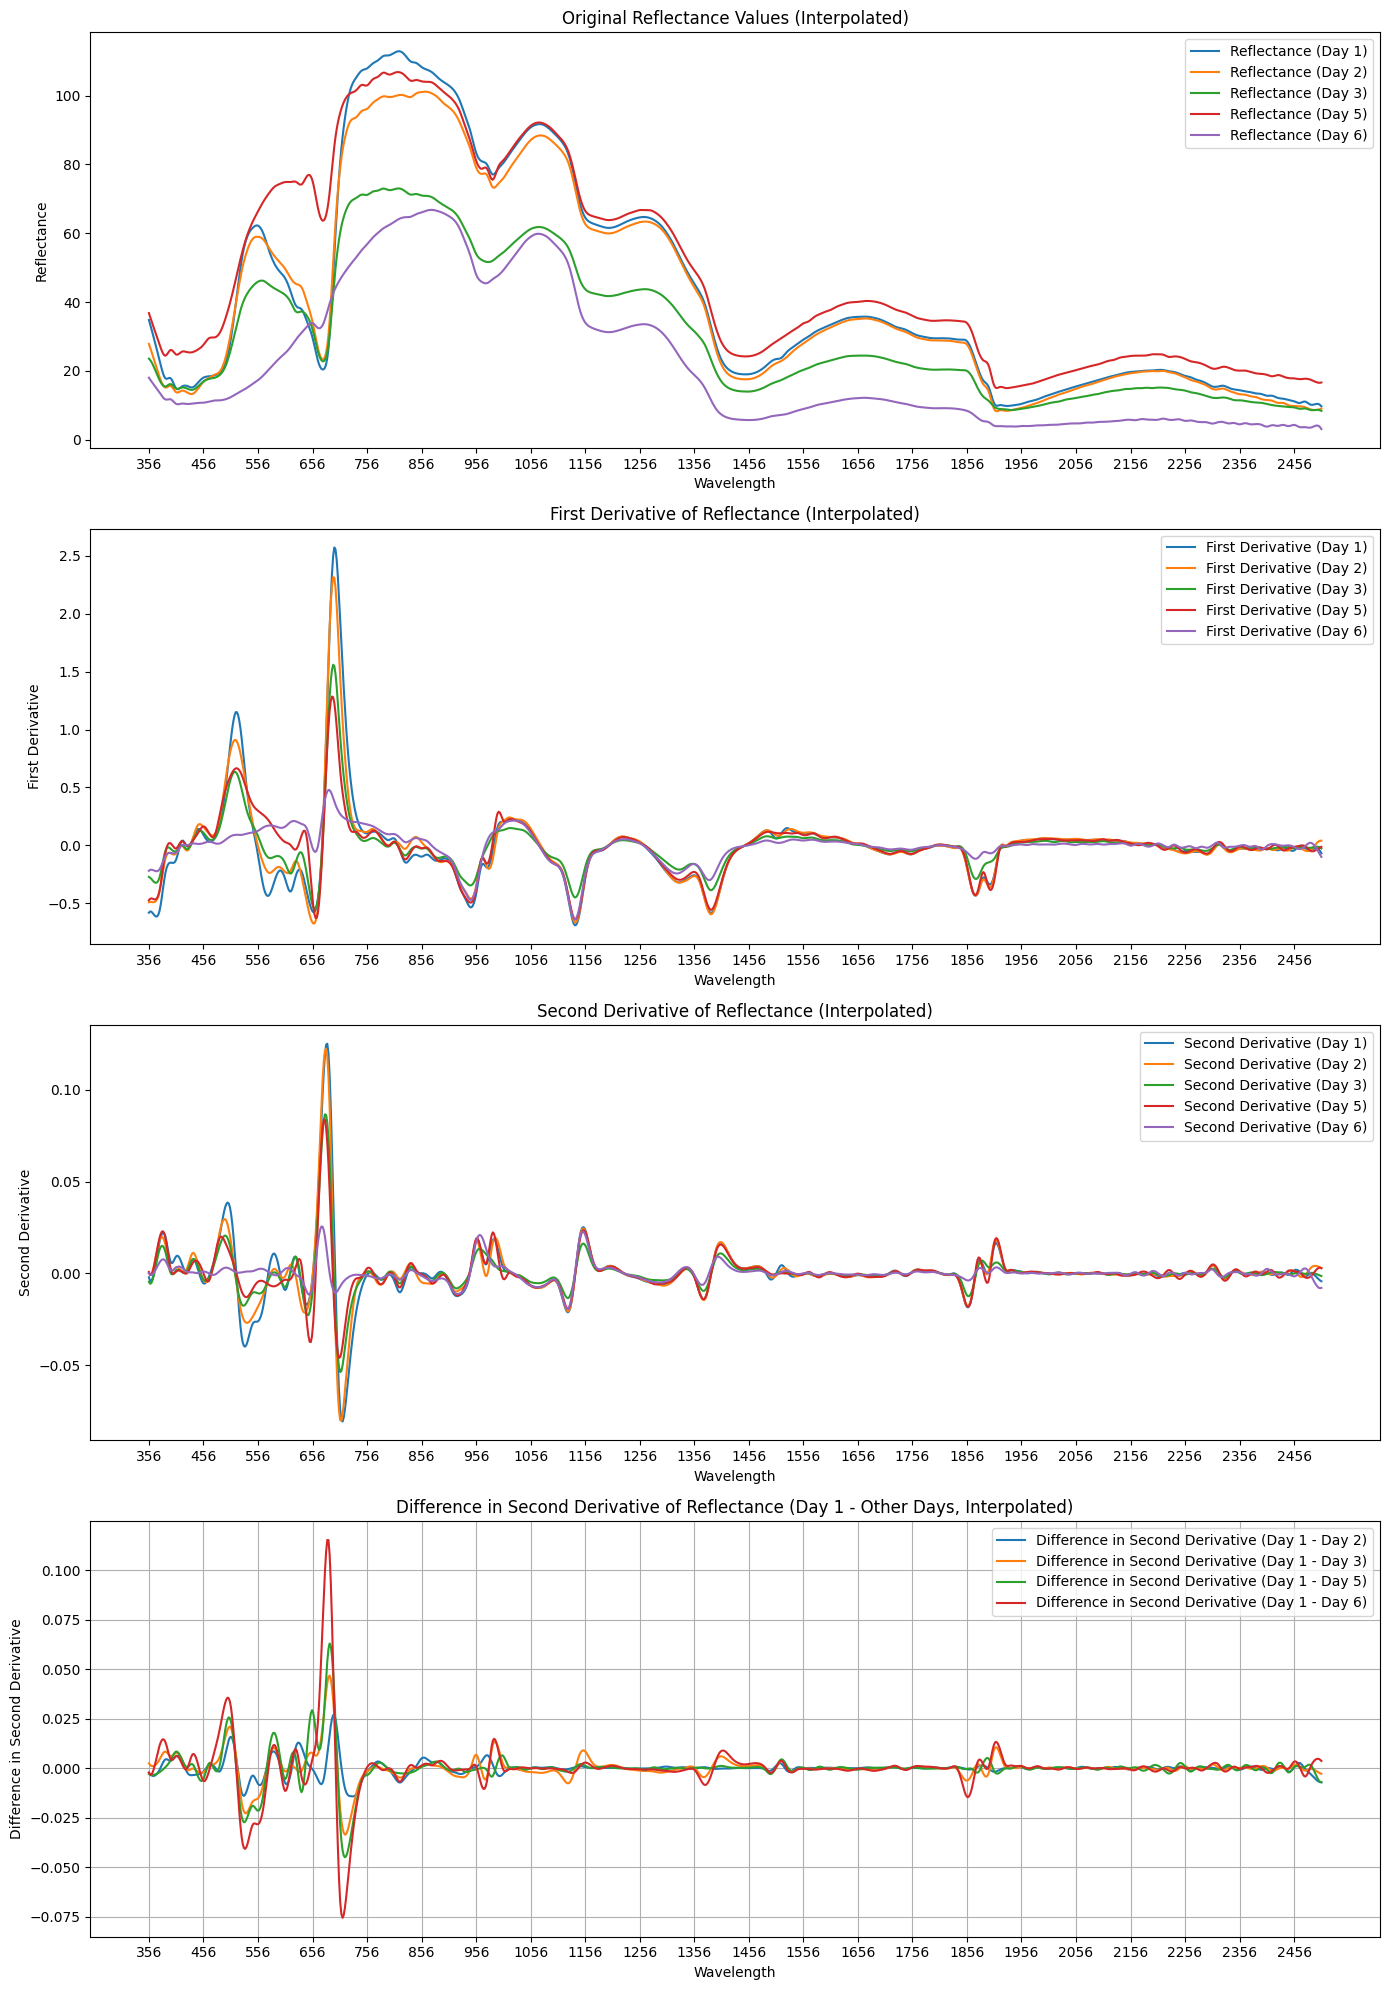

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# List of file paths, excluding Day 4
files = [
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D1GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D3GS1.csv",
    # Skipping Day 4
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D5GS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D6GS1.csv"
]

# Load data and calculate the derivatives
wavelengths = []
reflectances = []
first_derivatives = []
second_derivatives = []

# Load each file, calculate derivatives, and store results
for file in files:
    data = pd.read_csv(file)
    wavelength = data.iloc[:, 0]
    reflectance = data.iloc[:, -1]
    wavelengths.append(wavelength)
    reflectances.append(reflectance)
    
    # Calculate first and second derivatives
    first_derivative = np.gradient(reflectance, wavelength)
    second_derivative = np.gradient(first_derivative, wavelength)
    
    first_derivatives.append(first_derivative)
    second_derivatives.append(second_derivative)

# Define a finer wavelength range for smoother curves
min_wavelength = max(wavelength[0] for wavelength in wavelengths)
max_wavelength = min(wavelength.iloc[-1] for wavelength in wavelengths)
finer_wavelength = np.linspace(min_wavelength, max_wavelength, 1000)  # 1000 points for smooth curves

# Interpolate each spectrum and its derivatives to the finer wavelength grid
reflectances_interp = []
first_derivatives_interp = []
second_derivatives_interp = []

for i in range(len(reflectances)):
    # Interpolate reflectance
    reflectance_interp_func = interp1d(wavelengths[i], reflectances[i], kind='cubic')
    reflectances_interp.append(reflectance_interp_func(finer_wavelength))
    
    # Interpolate first derivative
    first_derivative_interp_func = interp1d(wavelengths[i], first_derivatives[i], kind='cubic')
    first_derivatives_interp.append(first_derivative_interp_func(finer_wavelength))
    
    # Interpolate second derivative
    second_derivative_interp_func = interp1d(wavelengths[i], second_derivatives[i], kind='cubic')
    second_derivatives_interp.append(second_derivative_interp_func(finer_wavelength))

# Plotting the results with the finer wavelength grid
plt.figure(figsize=(14, 20))

# Original Reflectance for all files
plt.subplot(4, 1, 1)
for i, reflectance_interp in enumerate(reflectances_interp):
    plt.plot(finer_wavelength, reflectance_interp, label=f'Reflectance (Day {i+1 if i < 3 else i+2})')
plt.title("Original Reflectance Values (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# First Derivative for all files
plt.subplot(4, 1, 2)
for i, first_derivative_interp in enumerate(first_derivatives_interp):
    plt.plot(finer_wavelength, first_derivative_interp, label=f'First Derivative (Day {i+1 if i < 3 else i+2})')
plt.title("First Derivative of Reflectance (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("First Derivative")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# Second Derivative for all files
plt.subplot(4, 1, 3)
for i, second_derivative_interp in enumerate(second_derivatives_interp):
    plt.plot(finer_wavelength, second_derivative_interp, label=f'Second Derivative (Day {i+1 if i < 3 else i+2})')
plt.title("Second Derivative of Reflectance (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Second Derivative")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# Differences in Second Derivative with respect to the first file
plt.subplot(4, 1, 4)
for i in range(1, len(second_derivatives_interp)):
    second_derivative_diff = second_derivatives_interp[0] - second_derivatives_interp[i]
    plt.plot(finer_wavelength, second_derivative_diff, label=f'Difference in Second Derivative (Day 1 - Day {i+1 if i < 3 else i+2})')
plt.title("Difference in Second Derivative of Reflectance (Day 1 - Other Days, Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Difference in Second Derivative")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

plt.tight_layout()
plt.show()


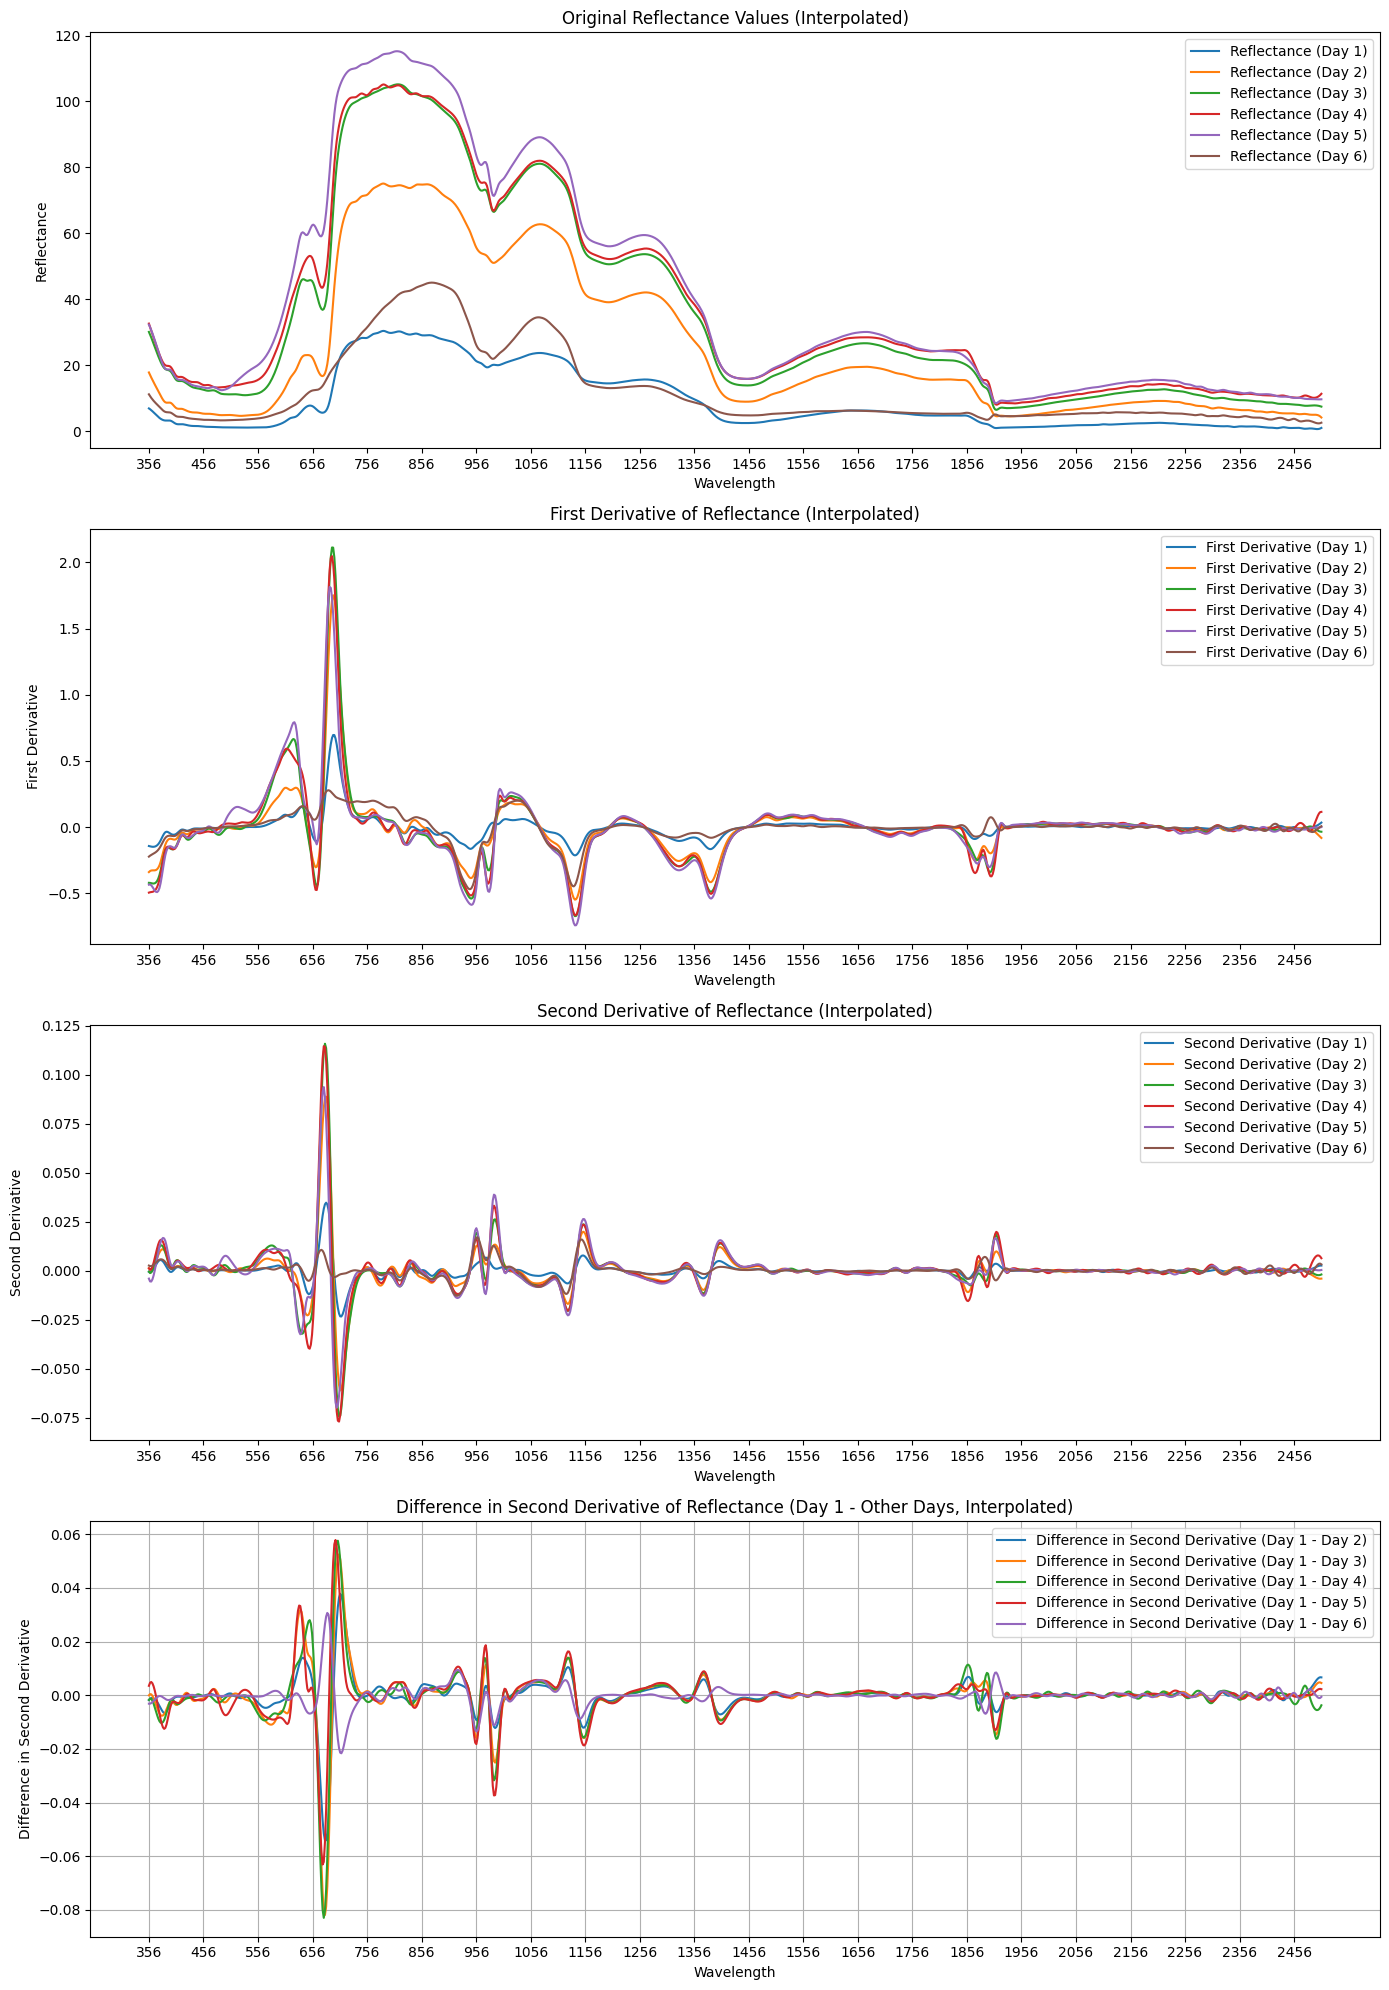

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# List of file paths for all six days
files = [
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D1RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D2RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D3RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D4RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D5RS1.csv",
    "C:\\Users\\sumat\\Desktop\\GSI Suman\\Processed Files\\D6RS1.csv"
]

# Initialize lists to hold wavelength, reflectance, and derivatives for each file
wavelengths = []
reflectances = []
first_derivatives = []
second_derivatives = []

# Load each file, calculate derivatives, and store results
for file in files:
    data = pd.read_csv(file)
    wavelength = data.iloc[:, 0]
    reflectance = data.iloc[:, -1]
    wavelengths.append(wavelength)
    reflectances.append(reflectance)
    
    # Calculate first and second derivatives
    first_derivative = np.gradient(reflectance, wavelength)
    second_derivative = np.gradient(first_derivative, wavelength)
    
    first_derivatives.append(first_derivative)
    second_derivatives.append(second_derivative)

# Define a finer wavelength range for smoother curves
min_wavelength = max(wavelength[0] for wavelength in wavelengths)
max_wavelength = min(wavelength.iloc[-1] for wavelength in wavelengths)
finer_wavelength = np.linspace(min_wavelength, max_wavelength, 1000)  # 1000 points for smooth curves

# Interpolate each spectrum and its derivatives to the finer wavelength grid
reflectances_interp = []
first_derivatives_interp = []
second_derivatives_interp = []

for i in range(len(reflectances)):
    # Interpolate reflectance
    reflectance_interp_func = interp1d(wavelengths[i], reflectances[i], kind='cubic')
    reflectances_interp.append(reflectance_interp_func(finer_wavelength))
    
    # Interpolate first derivative
    first_derivative_interp_func = interp1d(wavelengths[i], first_derivatives[i], kind='cubic')
    first_derivatives_interp.append(first_derivative_interp_func(finer_wavelength))
    
    # Interpolate second derivative
    second_derivative_interp_func = interp1d(wavelengths[i], second_derivatives[i], kind='cubic')
    second_derivatives_interp.append(second_derivative_interp_func(finer_wavelength))

# Plotting the results with the finer wavelength grid
plt.figure(figsize=(14, 20))

# Original Reflectance for all files
plt.subplot(4, 1, 1)
for i, reflectance_interp in enumerate(reflectances_interp):
    plt.plot(finer_wavelength, reflectance_interp, label=f'Reflectance (Day {i+1})')
plt.title("Original Reflectance Values (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Reflectance")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# First Derivative for all files
plt.subplot(4, 1, 2)
for i, first_derivative_interp in enumerate(first_derivatives_interp):
    plt.plot(finer_wavelength, first_derivative_interp, label=f'First Derivative (Day {i+1})')
plt.title("First Derivative of Reflectance (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("First Derivative")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# Second Derivative for all files
plt.subplot(4, 1, 3)
for i, second_derivative_interp in enumerate(second_derivatives_interp):
    plt.plot(finer_wavelength, second_derivative_interp, label=f'Second Derivative (Day {i+1})')
plt.title("Second Derivative of Reflectance (Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Second Derivative")
plt.legend()
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

# Differences in Second Derivative with respect to the first file
plt.subplot(4, 1, 4)
for i in range(1, len(second_derivatives_interp)):
    second_derivative_diff = second_derivatives_interp[0] - second_derivatives_interp[i]
    plt.plot(finer_wavelength, second_derivative_diff, label=f'Difference in Second Derivative (Day 1 - Day {i+1})')
plt.title("Difference in Second Derivative of Reflectance (Day 1 - Other Days, Interpolated)")
plt.xlabel("Wavelength")
plt.ylabel("Difference in Second Derivative")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min_wavelength, max_wavelength + 1, 100))  # Set x-ticks with 100 intervals

plt.tight_layout()
plt.show()
